In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter, attrgetter

# IMPORRTATION DES DONNEES 

In [2]:
data = pd.read_csv("../Data/data_2019.csv")

data = data.drop('Unnamed: 0',axis = 'columns')

data['Park DateTime'] = pd.to_datetime(data['Park DateTime'])
data.set_index("Park DateTime", inplace = True)


# AJOUT DE VARIABLES COMPLEMENTAIRES

In [3]:

data["Journb"] = pd.DatetimeIndex(data.index).dayofweek

Semaine =  ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]

Jours = {}
for i, jour in enumerate(Semaine):
    Jours[i] = jour

j = []
for i in data["Journb"] : 
    j.append(Jours[i])

data["Jour"] = j


data['Free'] = data.Total - data.Occupated
data["TauxF"] = (data.Free/data.Total)*100

data["Heure"] = pd.DatetimeIndex(data.index).time
data["H"] = pd.DatetimeIndex(data.index).hour

data

,Park Name,Park Status,Occupated,Total,x_pos,y_pos,Journb,Jour,Free,TauxF,Heure,H
Park DateTime,,,,,,,,,,,,
2019-01-01 01:00:00,ANTI,Open,36,239,3.888819,43.608716,1,Mardi,203,84.937238,01:00:00,1
2019-01-01 01:20:00,ANTI,Open,34,239,3.888819,43.608716,1,Mardi,205,85.774059,01:20:00,1
2019-01-01 01:40:00,ANTI,Open,34,239,3.888819,43.608716,1,Mardi,205,85.774059,01:40:00,1
2019-01-01 02:00:00,ANTI,Open,30,239,3.888819,43.608716,1,Mardi,209,87.447699,02:00:00,2
2019-01-01 02:20:00,ANTI,Open,29,239,3.888819,43.608716,1,Mardi,210,87.866109,02:20:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:20:00,VICA,Open,10,150,3.898426,43.632771,1,Mardi,140,93.333333,23:20:00,23
2019-12-31 23:40:00,VICA,Open,10,150,3.898426,43.632771,1,Mardi,140,93.333333,23:40:00,23
2020-01-01 00:00:00,VICA,Open,10,150,3.898426,43.632771,2,Mercredi,140,93.333333,00:00:00,0


In [4]:
NBV =len(data['Park Name'].unique())
NBV
data['Park Name'].unique()

array(['ANTI', 'ARCT', 'CDGA', 'CIRC', 'COME', 'CORU', 'EURO', 'FOCH',
       'GAMB', 'GARC', 'GARE', 'GA250', 'MEDC', 'MOSS', 'OCCI', 'PITO',
       'SABI', 'SABL', 'SJLC', 'TRIA', 'VICA'], dtype=object)

# PLOT PARKINGS

In [5]:
#data.drop_duplicates(subset = "Park DateTime" , keep = 'first', inplace=True)

#plt.figure(1, figsize=(12, 8))
#plt.plot(sorted(data[data['Park Name'] == "VICA" ].index), data[data['Park Name'] == "VICA" ].Free)



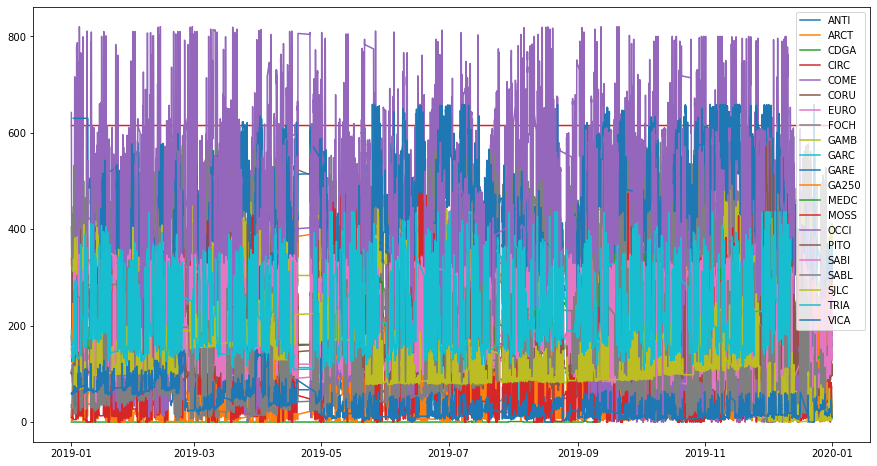

In [6]:
plt.figure(1, figsize=(15, 8))

for station in data['Park Name'].unique() : 
    
    #plt.plot(data[data['Park Name'] == "ANTI" ].Free, label = station )
    plt.plot( sorted(data[data['Park Name'] == station ].index),data[data['Park Name'] == station ].Occupated.values, label = station )

plt.legend()
plt.show()

# CREATION DE DATAFRAME PAR PARKING

In [7]:
#variables = data['Park Name'].unique()
#Stations =[]
#NomS =[]
#for station in variables :
    #globals()[station] = data[data['Park Name'] ==  station]
    #Stations.append(globals()[station])
#Stations.columns


In [8]:

variables = data['Park Name'].unique()
Stations ={}
NomS =[]
for station in variables :
    globals()[station] = data[data['Park Name'] ==  station]
    Stations[station] = (globals()[station])



In [9]:
Tableau =  pd.DataFrame(data=None, columns = data.columns)
for station in Stations : 
    Tableau = pd.concat([Tableau,Stations[station].tail(1)], ignore_index=False)

d = Tableau.sort_index(axis = 0, ascending = True)


# PLOT PARKING "ANTI"

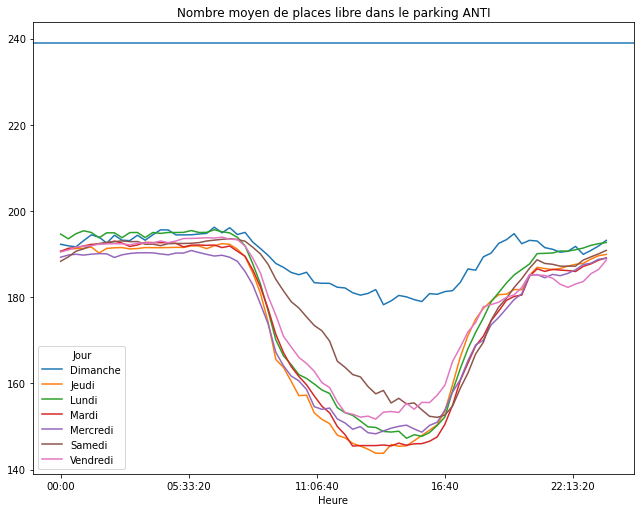

In [10]:
#la moyenne des occuppations par jour
#data["Heure"] = pd.DatetimeIndex(data.index).time

ANTI2 = ANTI.groupby(["Jour","Heure"]).mean()

#sns.relplot(data=ANTI2, kind="line",x = "Heure", y="Occupated", col = "Jour",hue="Jour", style="Jour")
#plt.gcf().set_size_inches(15, 8)

ax = ANTI2.Free.unstack(level=0).plot(kind='line', subplots=False, rot=0, figsize=(9, 7))
plt.axhline(y=max(ANTI2.Total))

plt.tight_layout()
plt.title ("Nombre moyen de places libre dans le parking ANTI")


plt.savefig("NBFreemoyenANTI", dpi=700)


In [11]:
# HEATMAP AFFLUENCE (TAUX )

In [12]:
#ax = ANTI3.TauxF.unstack(level=0).plot(kind='line', subplots=False, rot=0, figsize=(9, 7))
#plt.tight_layout()

plt.figure(figsize = (9,7))
ax = sns.heatmap(ANTI2.TauxF.unstack(level=0))
plt.title ("Taux places libre dans le parking ANTI")

plt.savefig("TauxFree ", dpi=700)

NameError: name 'sns' is not defined

<Figure size 648x504 with 0 Axes>

In [ ]:
for station in Stations :
    df = Stations[station]
    df = df.drop(['Park Name', 'x_pos','y_pos','H'], axis=1)
    df["Date"] = pd.DatetimeIndex(df.index).date
    df.to_csv("/Users/araziissouffou/Documents/COURS/M1/TER/Marathon_web/Data/Parking/"+station+".csv", encoding='utf-8')

In [ ]:
df = Stations["ANTI"]
df = df.drop(['Park Name', 'x_pos','y_pos','H'], axis=1, inplace =True)
df["Date"] = pd.DatetimeIndex(df.index).date
df

In [ ]:
for station in Stations :
    df = Stations[station].groupby(["Jour","Heure"]).mean()
    df = df.Free.unstack(level=0)
    
    df.to_csv("MoyenFreeJH"+station+".csv", encoding='utf-8')



In [ ]:
import seaborn as sns

#plt.figure(1, figsize=(15, 8))
#sns.displot(data=ANTI, kind="ecdf", x=ANTI.index, hue="Jour", rug=True)
sns.relplot(
    data=ANTI3, kind="line",
    x = "H", y="TauxF",
    hue="Jour", style="Jour",
)
plt.gcf().set_size_inches(15, 8)

